In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# basic data processing and cleaning
# note: we manually changed the header line of the csv,
# removing the spaces between commas and modifying the last column name

data = pd.read_csv("../data/analyzed_data.tsv", sep="\t")

print(data[:10])
print(list(data.columns.values))
print(np.size(data))



   Unnamed: 0        MTurk ID  Sentence Number  List Number  Subset Number  \
0           1  A30RAYNDOWQ61S               56            3              2   
1           2  A30RAYNDOWQ61S               51            3              2   
2           3  A30RAYNDOWQ61S               91            3              2   
3           4  A30RAYNDOWQ61S               58            3              2   
4           5  A30RAYNDOWQ61S               83            3              2   
5           6  A30RAYNDOWQ61S               67            3              2   
6           7  A30RAYNDOWQ61S               94            3              2   
7           8  A30RAYNDOWQ61S               70            3              2   
8           9  A30RAYNDOWQ61S               54            3              2   
9          10  A30RAYNDOWQ61S               62            3              2   

   Trial Number                                    Target Sentence  \
0             2  the blast shattered the windows of the villa a...   
1

# Timing Data

total number of matches:  7294
percentage of truncated sentences out of total:  0.9104743624897176
total number of non matches:  21600
percentage of truncated sentences out of total:  0.9630555555555556


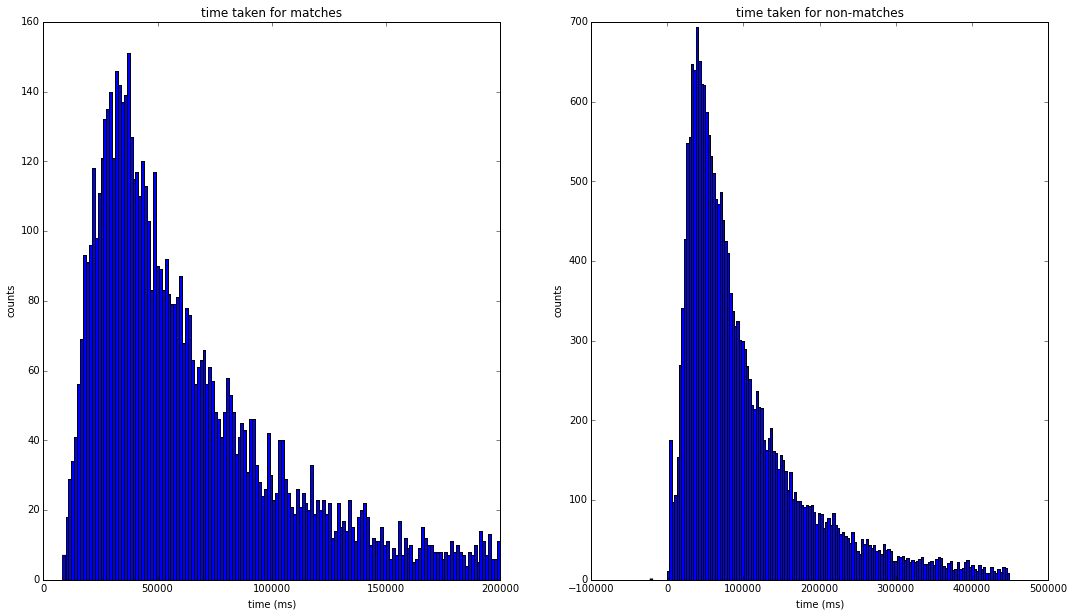

In [7]:
# timing is interesting, almost all of it is concentrated in a small time window
# large outliers

fig = plt.figure(figsize=(10,10))

time = data['Time (ms)']

same = data[data['ProdMatchesOrig']== True]
sameTimes = list(same['Time (ms)'])

sameLong = [x for x in sameTimes if x >  200000 ]
sameShort = [x for x in sameTimes if x < 200000 ]

print("total number of matches: ", len(same))
print("percentage of truncated sentences out of total: ", len(sameShort) / len(sameTimes))

# -----------------------
different = data[data['ProdMatchesOrig']== False]
diffDistances = list(different['editDist'])
diffTimes = list(different['Time (ms)'])

fig = plt.figure(figsize=(10,10))
diffLong = [x for x in diffTimes if x > 1000000 ]
diffShort = [x for x in diffTimes if x < 450000 ]

print("total number of non matches: ",len(different))
print("percentage of truncated sentences out of total: ", len(diffShort) / len(diffTimes))

# ---------------------------------


fig = plt.figure(figsize=(18,10))
plt.subplot(121)
plt.title("time taken for matches")
plt.xlabel("time (ms)")
plt.ylabel("counts")
x = plt.hist(sameShort,bins=150)

plt.subplot(122)
plt.title("time taken for non-matches")
plt.xlabel("time (ms)")
plt.ylabel("counts")
y = plt.hist(diffShort,bins=150)


## Matching Original

In [5]:
print(data.groupby('ProdMatchesOrig').size())
print()
print(7294/21600)

ProdMatchesOrig
False    21600
True      7294
dtype: int64

0.3376851851851852


## Longest Common Substring
Interesting bimodal distribution appears with the length of the longest common substrings.
Would be interesting to look at this compared to the actual strings, as well as the distance 
avg distance metric, assuming we calculated it correctly.  

/home/aik/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/aik/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


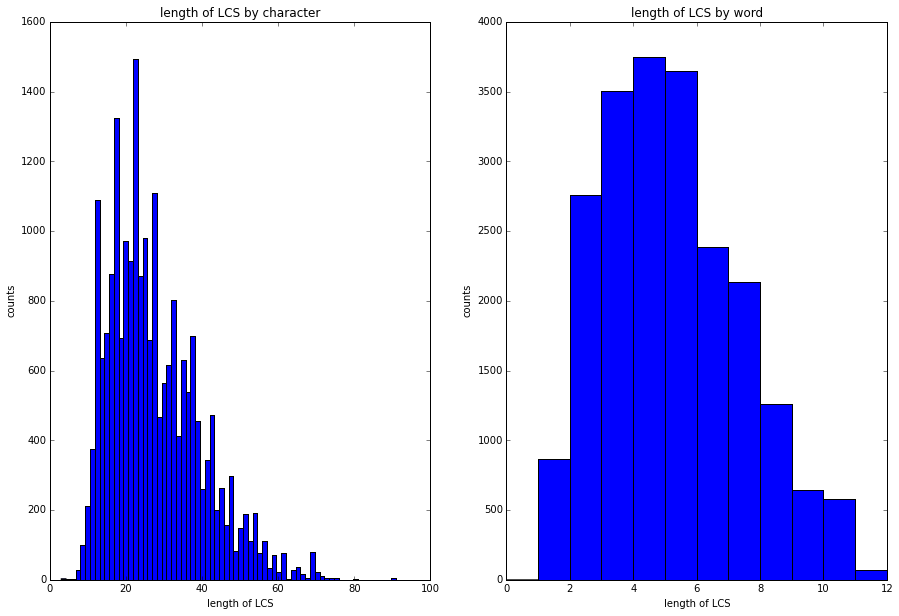

In [12]:
different = data[data['ProdMatchesOrig'] != True]
columns = ['Produced Sentence','Target Sentence','lcs']
df_lcs = pd.DataFrame(different, columns=columns)


def lengthLCSByCharacter(dataframe_row):
    return len(dataframe_row['lcs'])


def lengthLCSByWord(dataframe_row):
    return len(dataframe_row['lcs'].split())
    
    
different['lenLCSChar'] = different.apply(lengthLCSByCharacter, axis=1)   
different['lenLCSWord'] = different.apply(lengthLCSByWord, axis=1)

df_lcs['lenLCSChar'] = df_lcs.apply(lengthLCSByCharacter, axis=1)   
df_lcs['lenLCSWord'] = df_lcs.apply(lengthLCSByWord, axis=1)

#plt.boxplot(lenLCS)

In [57]:
# by character
# examples of sentence pairs
first_mode = df_lcs.loc[(df_lcs['lenLCSChar'] > 15) & (df_lcs['lenLCSChar'] < 35)]
second_mode = df_lcs.loc[(df_lcs['lenLCSChar'] > 55) & (df_lcs['lenLCSChar'] < 80)]
trough = df_lcs.loc[(df_lcs['lenLCSChar'] > 40) & (df_lcs['lenLCSChar'] < 55)]

fm_a = str(first_mode.iloc[0]['Produced Sentence'])
fm_b = str(first_mode.iloc[0]['Target Sentence'])
fm_c = str(first_mode.iloc[0]['lcs'])
print(fm_a,":", fm_b,":", fm_c)

sm_a = str(second_mode.iloc[0]['Produced Sentence'])
sm_b = str(second_mode.iloc[0]['Target Sentence'])
sm_c = str(second_mode.iloc[0]['lcs'])
print(sm_a,":", sm_b,":", sm_c)

tm_a = str(trough.iloc[0]['Produced Sentence'])
tm_b = str(trough.iloc[0]['Target Sentence'])
tm_c = str(trough.iloc[0]['lcs'])
print(tm_a,":", tm_b,":", tm_c)

# by word
# examples of sentence pairs

equipment was often quickly moved when the inspectors were about to arrive : the equipment was often moved quickly when inspectors were about to arrive :  inspectors were about to arrive
the police said they could not comment about any incident during flight : police said they could not comment about any incident during the flight : police said they could not comment about any incident during 
is he the person who has stood up about the tax cuts : he is the person who has stood up about the tax cuts :  the person who has stood up about the tax cuts


/home/aik/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


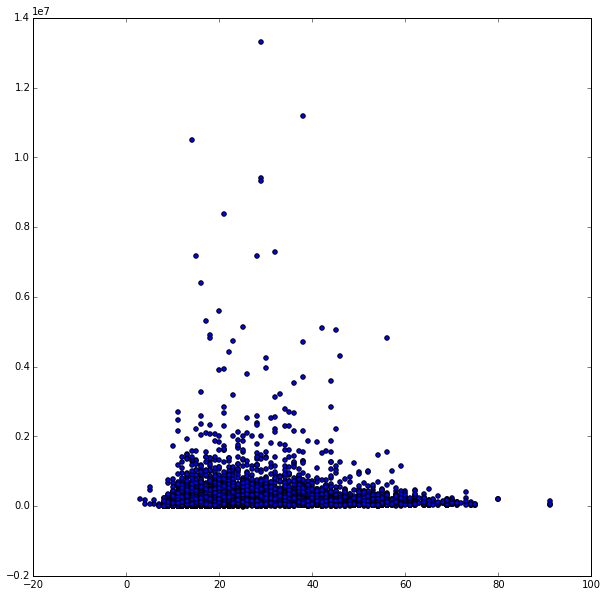

In [48]:
# time aginst length of lcs

fig = plt.figure(figsize=(10,10))
plt.scatter(different['lenLCSChar'], different['Time (ms)'])

## Edit Distance

/home/aik/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


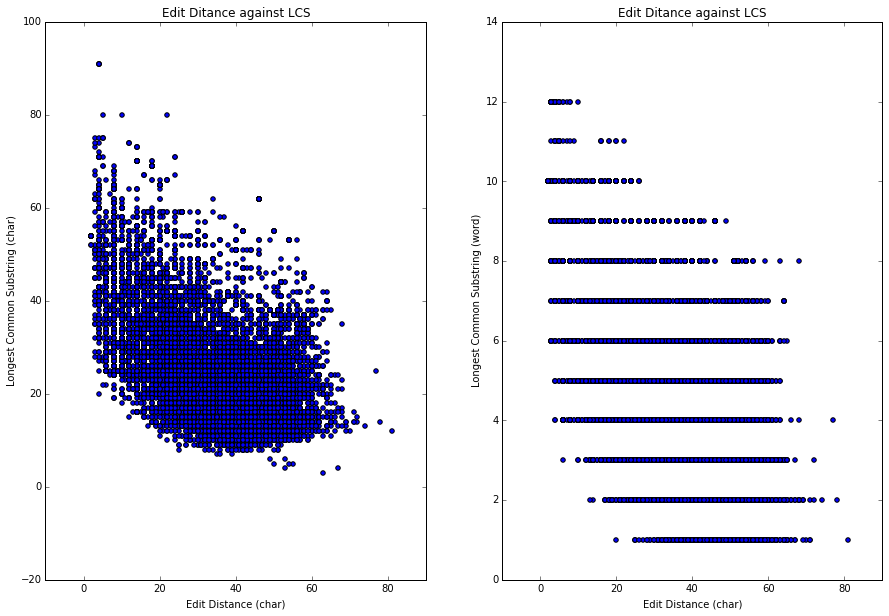

In [15]:
# scatter plot of edit distance against length longest common substring 
# makes sense, longer the edit distance, shorter the lcs

fig = plt.figure(figsize=(10,10))


fig = plt.figure(figsize=(15,10))
plt.subplot(121)
plt.scatter(different['editDist'],different['lenLCSChar'])
plt.title("Edit Ditance against LCS")
plt.xlabel("Edit Distance (char)")
plt.ylabel("Longest Common Substring (char)")


plt.subplot(122)
plt.scatter(different['editDist'],different['lenLCSWord'])
plt.title("Edit Ditance against LCS")
plt.xlabel("Edit Distance (char)")
plt.ylabel("Longest Common Substring (word)")


In [20]:
# edit dist between target and scramble

def levenshtein(s, t):
        ''' From Wikipedia article; Iterative with two matrix rows. '''
        if s == t: return 0
        elif len(s) == 0: return len(t)
        elif len(t) == 0: return len(s)
        v0 = [None] * (len(t) + 1)
        v1 = [None] * (len(t) + 1)
        for i in range(len(v0)):
            v0[i] = i
        for i in range(len(s)):
            v1[0] = i + 1
            for j in range(len(t)):
                cost = 0 if s[i] == t[j] else 1
                v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
            for j in range(len(v0)):
                v0[j] = v1[j]
                
        return v1[len(t)]

    
def editDriver( dataframe_row ):
    a = dataframe_row['Scrambled Sentence']
    b = dataframe_row['Target Sentence']
    
    return levenshtein( a, b )

#data['editDistScrambled'] = data.apply(editDriver, axis=1)
different['editDistScrambled'] = different.apply(editDriver, axis=1)

/home/aik/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/home/aik/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


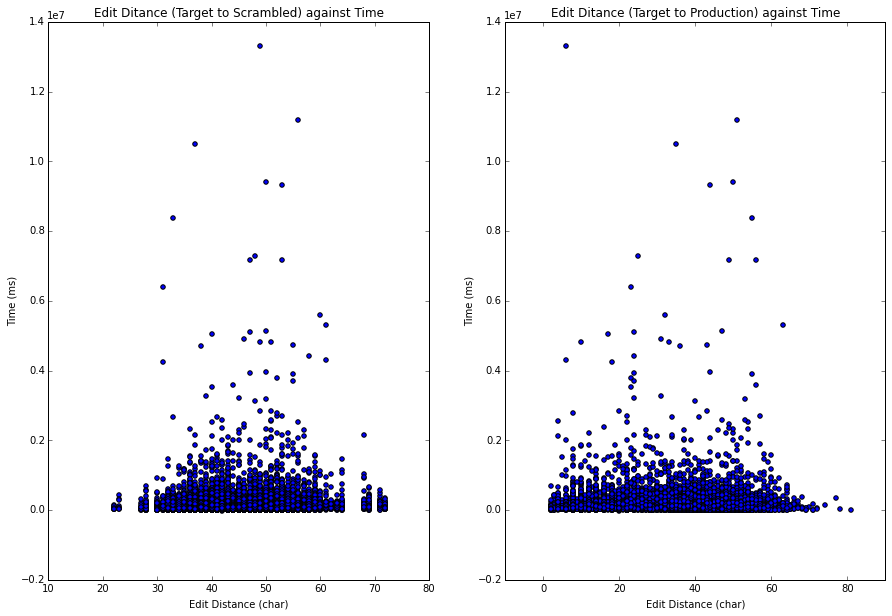

In [23]:
# doesn't look like correlation between increased time and greated diff between scrambled and target
fig = plt.figure(figsize=(10,10))


fig = plt.figure(figsize=(15,10))
plt.subplot(121)
plt.scatter( different['editDistScrambled'], different['Time (ms)'])
plt.title("Edit Ditance (Target to Scrambled) against Time")
plt.xlabel("Edit Distance (char)")
plt.ylabel("Time (ms)")


plt.subplot(122)
plt.scatter(different['editDist'], different['Time (ms)'])
plt.title("Edit Ditance (Target to Production) against Time")
plt.xlabel("Edit Distance (char)")
plt.ylabel("Time (ms)")


## Target Sentence Statistics

12.0 67.293486537
12.0665536097 67.5722641379


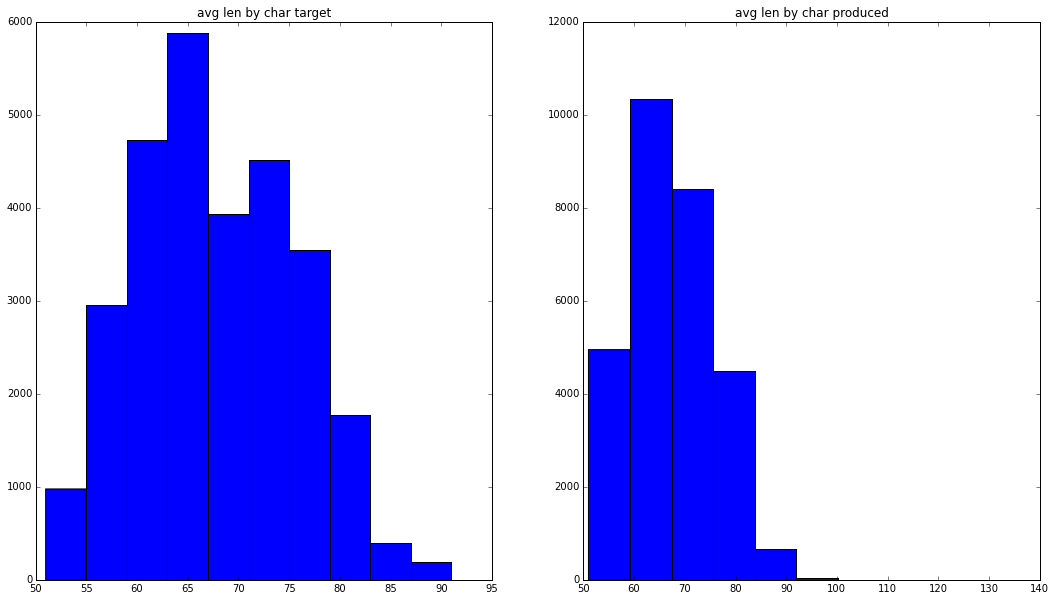

In [40]:
# average length in words of matches and non-matches

def getLenTgtWord(s):
    return len(s.split())

def getLenTgtChar(s):
    return len(s)

def getLenTgtDriverC( dataframe_row ):
    return getLenTgtChar( dataframe_row['Target Sentence'] )

def getLenTgtDriverW( dataframe_row ):
    return getLenTgtWord( dataframe_row['Target Sentence'] )


data['tgt_lengthWord'] = data.apply(getLenTgtDriverW, axis=1)
data['tgt_lengthChar'] = data.apply(getLenTgtDriverC, axis=1)

print(np.average(data['tgt_lengthWord']), np.average(data['tgt_lengthChar']))

# ----------
def getLenProdWord(s):
    return len(s.split())

def getLenProdChar(s):
    return len(s)

def getLenProdDriverC( dataframe_row ):
    return getLenTgtChar( dataframe_row['Produced Sentence'] )

def getLenProdDriverW( dataframe_row ):
    return getLenTgtWord( dataframe_row['Produced Sentence'] )


data['prod_lengthWord'] = data.apply(getLenProdDriverW, axis=1)
data['prod_lengthChar'] = data.apply(getLenProdDriverC, axis=1)

print(np.average(data['prod_lengthWord']), np.average(data['prod_lengthChar']))
# -----------------

fig = plt.figure(figsize=(18,10))
plt.subplot(121)
plt.title("avg len by char target")
x = plt.hist(data['tgt_lengthChar'])

plt.subplot(122)
plt.title("avg len by char produced")
y = plt.hist(data['prod_lengthChar'])


## Proportion of Matching Bigrams

/home/aik/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


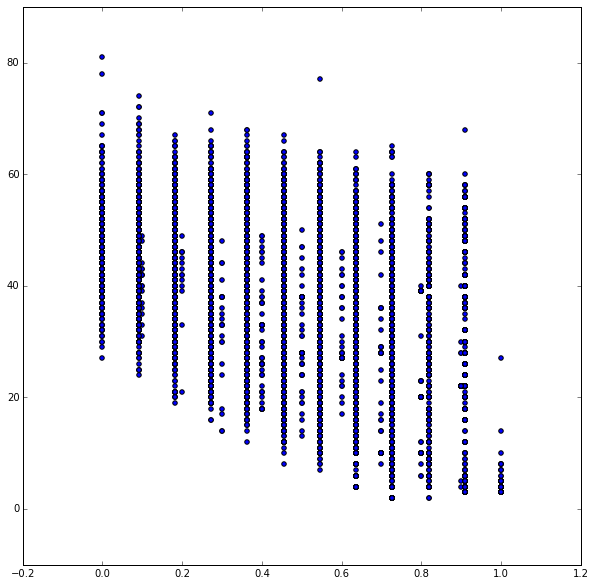

In [52]:
fig = plt.figure(figsize=(10,10))
plt.scatter(different['proportionMatchingBigram'], different['editDist'])

## Delta Distance

In [54]:
# https://github.com/clips/pattern/blob/master/pattern/vector/stopwords-en.txt
stop = set(''''d, 'll, 'm, 're, 's, 't, n't, 've, a, aboard, about, above, across, after, again, against, all, almost, alone, along, alongside, already, also, although, always, am, amid, amidst, among, amongst, an, and, another, anti, any, anybody, anyone, anything, anywhere, are, area, areas, aren't, around, as, ask, asked, asking, asks, astride, at, aught, away, back, backed, backing, backs, bar, barring, be, became, because, become, becomes, been, before, began, behind, being, beings, below, beneath, beside, besides, best, better, between, beyond, big, both, but, by, came, can, can't, cannot, case, cases, certain, certainly, circa, clear, clearly, come, concerning, considering, could, couldn't, daren't, despite, did, didn't, differ, different, differently, do, does, doesn't, doing, don't, done, down, down, downed, downing, downs, during, each, early, either, end, ended, ending, ends, enough, even, evenly, ever, every, everybody, everyone, everything, everywhere, except, excepting, excluding, face, faces, fact, facts, far, felt, few, fewer, find, finds, first, five, following, for, four, from, full, fully, further, furthered, furthering, furthers, gave, general, generally, get, gets, give, given, gives, go, goes, going, good, goods, got, great, greater, greatest, group, grouped, grouping, groups, had, hadn't, has, hasn't, have, haven't, having, he, he'd, he'll, he's, her, here, here's, hers, herself, high, high, high, higher, highest, him, himself, his, hisself, how, how's, however, i, i'd, i'll, i'm, i've, idem, if, ilk, important, in, including, inside, interest, interested, interesting, interests, into, is, isn't, it, it's, its, itself, just, keep, keeps, kind, knew, know, known, knows, large, largely, last, later, latest, least, less, let, let's, lets, like, likely, long, longer, longest, made, make, making, man, many, may, me, member, members, men, might, mightn't, mine, minus, more, most, mostly, mr, mrs, much, must, mustn't, my, myself, naught, near, necessary, need, needed, needing, needn't, needs, neither, never, new, new, newer, newest, next, no, nobody, non, none, noone, nor, not, nothing, notwithstanding, now, nowhere, number, numbers, of, off, often, old, older, oldest, on, once, one, oneself, only, onto, open, opened, opening, opens, opposite, or, order, ordered, ordering, orders, other, others, otherwise, ought, oughtn't, our, ours, ourself, ourselves, out, outside, over, own, part, parted, parting, parts, past, pending, per, perhaps, place, places, plus, point, pointed, pointing, points, possible, present, presented, presenting, presents, problem, problems, put, puts, quite, rather, really, regarding, right, right, room, rooms, round, said, same, save, saw, say, says, second, seconds, see, seem, seemed, seeming, seems, seen, sees, self, several, shall, shan't, she, she'd, she'll, she's, should, shouldn't, show, showed, showing, shows, side, sides, since, small, smaller, smallest, so, some, somebody, someone, something, somewhat, somewhere, state, states, still, still, such, suchlike, sundry, sure, take, taken, than, that, that's, the, thee, their, theirs, them, themselves, then, there, there's, therefore, these, they, they'd, they'll, they're, they've, thine, thing, things, think, thinks, this, those, thou, though, thought, thoughts, three, through, throughout, thus, thyself, till, to, today, together, too, took, tother, toward, towards, turn, turned, turning, turns, twain, two, under, underneath, unless, unlike, until, up, upon, us, use, used, uses, various, versus, very, via, vis-a-vis, want, wanted, wanting, wants, was, wasn't, way, ways, we, we'd, we'll, we're, we've, well, wells, went, were, weren't, what, what's, whatall, whatever, whatsoever, when, when's, where, where's, whereas, wherewith, wherewithal, whether, which, whichever, whichsoever, while, who, who's, whoever, whole, whom, whomever, whomso, whomsoever, whose, whosoever, why, why's, will, with, within, without, won't, work, worked, working, works, worth, would, wouldn't, ye, year, years, yet, yon, yonder, you, you'd, you'll, you're, you've, you-all, young, younger, youngest, your, yours, yourself, yourselves'''.split(', '))


In [57]:
import re

def getBigrams( string ):
    bigs = []
    sep = string.lower().split()
    for k,v in enumerate(sep):
        if k == len(sep) - 1:
            break
        else:
            bigs.append((v,sep[k+1]))
    return bigs

def removeStopWords( s ):
    production = s.split( )
    for i in production:
        if i in stop:
            s = re.sub(r"\s{0}\s".format(i),' ',s)
    return s.split( )
            
def deltaDistanceDriver(dataframe_row):    
    prod_content = dataframe_row['Produced Sentence']
    target_content = dataframe_row["Target Sentence"]
    
    prod_content = ' '.join(removeStopWords(prod_content))
    target_content = ' '.join(removeStopWords(target_content))

    bigrams = getBigrams(target_content)
    
    all_matches = []
    for bigram in bigrams:
        match = re.findall(r"{0}\s(.*)\s{1}".format(bigram[0], bigram[1]), prod_content)
        if match:
            matches = match[0].split()
            all_matches += matches
            
    ratio = len(all_matches) / len(bigrams)
    return ratio

data['deltaDistance2'] = data.apply(deltaDistanceDriver, axis=1)


In [63]:
data.to_csv("../data/analyzed_data_second.tsv",sep="\t")

(array([  2.08270000e+04,   6.56100000e+03,   1.38300000e+03,
          1.16000000e+02,   4.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

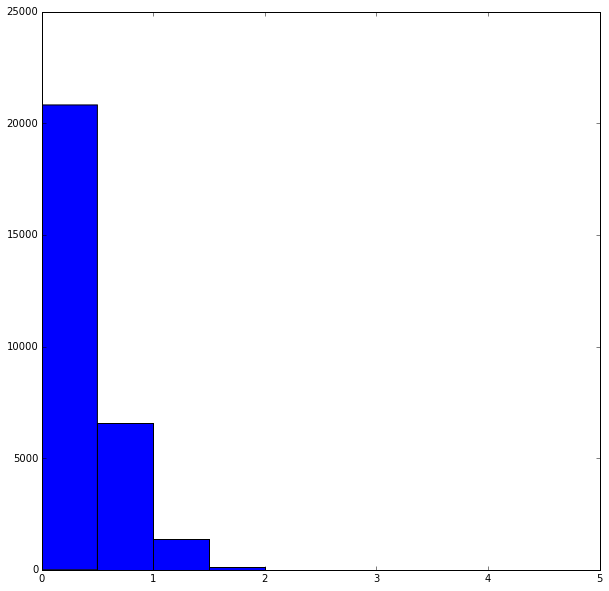

In [59]:
fig = plt.figure(figsize=(10,10))
plt.hist(data['deltaDistance2'])

## edit dist scrambled against time and length lcs

/home/aik/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


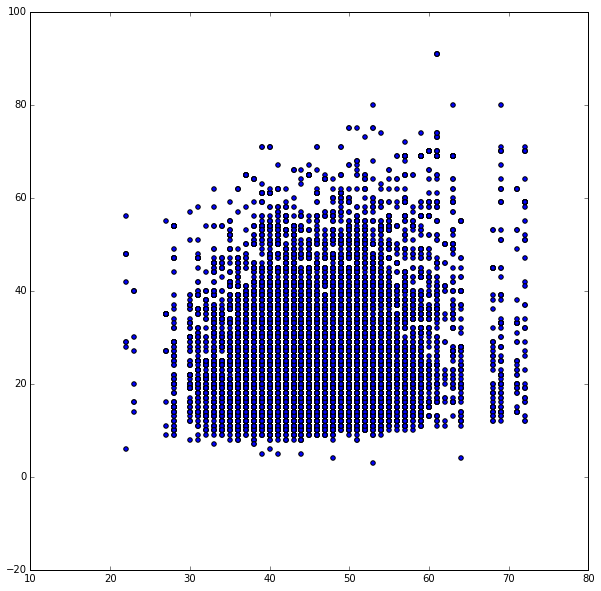

In [62]:
fig = plt.figure(figsize=(10,10))
plt.scatter(different['editDistScrambled'],different['lenLCSChar'])